## Import the system libraries

In [209]:
import os
import warnings
warnings.simplefilter('ignore')

## Import the data handling libraries

In [52]:
import numpy as np
import pandas as pd

## Import data visualization library

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline

## Scikit image elements

In [54]:
from skimage.io import imread,imshow
from skimage.transform import resize
from skimage.color import rgb2gray

## set the working directory and read all the images

In [55]:
china=os.listdir("D:/AI Folder/Currency-20220605T061310Z-001/Currency/China")

In [56]:
china

['1.jpg',
 '10.jpg',
 '11.jpg',
 '12.jpg',
 '13.gif',
 '14.jpg',
 '15.jpg',
 '16.jpg',
 '17.jpg',
 '18.jpg',
 '19.jpg',
 '2.jpg',
 '20.jpg',
 '21.jpg',
 '22.jpg',
 '23.jpg',
 '24.jpg',
 '25.jpg',
 '26.jpg',
 '27.jpg',
 '28.jpg',
 '29.jpg',
 '3.JPG',
 '30.jpg',
 '31.JPG',
 '32.jpg',
 '33.jpg',
 '34.jpg',
 '35.jpg',
 '36.jpg',
 '37.gif',
 '38.jpg',
 '39.jpg',
 '4.jpg',
 '40.jpg',
 '41.jpg',
 '42.jpg',
 '43.jpg',
 '44.jpg',
 '45.jpg',
 '46.jpg',
 '47.jpg',
 '48.jpg',
 '49.jpg',
 '5.jpg',
 '50.jpg',
 '51.jpg',
 '52.jpg',
 '53.jpg',
 '54.jpg',
 '55.jpg',
 '56.jpg',
 '57.jpg',
 '58.jpg',
 '59.jpg',
 '6.jpg',
 '60.jpg',
 '7.jpg',
 '8.jpg',
 '9.jpg']

In [57]:
limit=60
china_images=[None]*limit
j=0
for i in china:
    if(j<limit):
        china_images[j]=imread("D:/AI Folder/Currency-20220605T061310Z-001/Currency/China/"+i)
        j+=1
    else:
        break

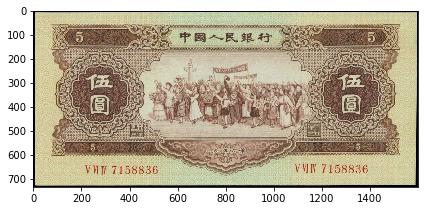

In [58]:
imshow(china_images[1])

In [59]:
china_image_bw=[None]*limit
j=0
for i in enumerate(china):
    if(j<limit):
        china_image_bw[j]=rgb2gray(china_images[j])
        j+=1
    else:
        break

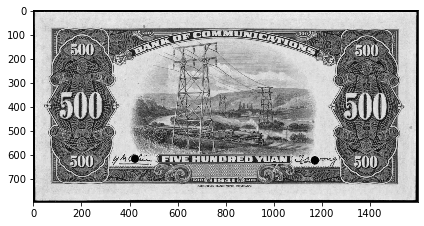

In [60]:
imshow(china_image_bw[10])

In [61]:
china_image_bw[1].shape

(734, 1600)

In [62]:
china_image_bw[2].shape

(905, 1000)

In [63]:
for j in range(60):
    ch=china_image_bw[j]
    china_image_bw[j]=resize(ch,(600,600))

In [64]:
china_image_bw[1].shape

(600, 600)

In [65]:
china_image_bw[59].shape

(600, 600)

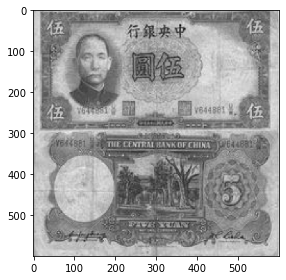

In [66]:
imshow(china_image_bw[59])

In [67]:
china_image_bw

[array([[0.75988791, 0.75709864, 0.75297293, ..., 0.76055733, 0.76099695,
         0.76067397],
        [0.7559402 , 0.75494573, 0.75409889, ..., 0.75694178, 0.75699754,
         0.76056309],
        [0.75404676, 0.75367771, 0.75315645, ..., 0.75357863, 0.75651002,
         0.75568795],
        ...,
        [0.73488128, 0.73204193, 0.73896856, ..., 0.72244951, 0.72046119,
         0.72399634],
        [0.73968238, 0.73803226, 0.73779613, ..., 0.72102825, 0.72553902,
         0.72590157],
        [0.74298048, 0.73879115, 0.73477704, ..., 0.72261529, 0.72635137,
         0.72412417]]),
 array([[3.91499442e-03, 3.93518293e-03, 5.52161527e-03, ...,
         3.66526971e-03, 4.89904874e-03, 1.02384843e-02],
        [4.06363166e-03, 3.76850272e-03, 4.88653645e-03, ...,
         3.66526971e-03, 4.81957768e-03, 7.04779553e-03],
        [3.46341381e-03, 4.04757283e-03, 4.09630608e-03, ...,
         3.13085692e-03, 4.27559277e-03, 5.28465992e-03],
        ...,
        [1.35025373e-03, 1.94830744e

In [68]:
len_of_images=len(china_image_bw)

In [69]:
len_of_images

60

In [70]:
image_size_china=china_image_bw[1].shape

In [71]:
image_size_china

(600, 600)

In [72]:
flatten_size_china=image_size_china[0]*image_size_china[1]

In [73]:
flatten_size_china

360000

In [74]:
for i in range(60):
    china_image_bw[i]=np.ndarray.flatten(china_image_bw[i]).reshape(flatten_size_china,1)

In [75]:
china_image_bw=np.dstack(china_image_bw)

In [76]:
china_image_bw.shape

(360000, 1, 60)

### Change the axis position and dimension

china_image_bw=np.rollaxis(china_image_bw,axis=2,start=0)

In [79]:
china_image_bw.shape

(60, 360000, 1)

In [80]:
china_image_bw=china_image_bw.reshape(len_of_images,flatten_size_china)

In [81]:
china_image_bw.shape

(60, 360000)

## convert array into dataframe

In [82]:
china_data=pd.DataFrame(china_image_bw)

In [83]:
china_data

0         1         2         3         4         5         6       \
0   0.759888  0.757099  0.752973  0.751918  0.750451  0.758815  0.755900   
1   0.003915  0.003935  0.005522  0.005617  0.005853  0.006805  0.005969   
2   0.119745  0.106436  0.086890  0.079384  0.089891  0.099540  0.094060   
3   0.796334  0.821903  0.859986  0.884471  0.881634  0.868992  0.847998   
4   0.605612  0.616519  0.652269  0.757445  0.824805  0.777415  0.784707   
5   0.889293  0.916482  0.871914  0.873362  0.944958  0.843073  0.938542   
6   0.102725  0.096232  0.087138  0.086673  0.088389  0.086649  0.087077   
7   0.360599  0.357059  0.362502  0.365570  0.360653  0.375761  0.321684   
8   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
9   0.986959  0.987751  0.986662  0.985573  0.986459  0.990198  0.993938   
10  0.003922  0.003922  0.003878  0.003165  0.003042  0.003175  0.004911   
11  0.091480  0.099777  0.088768  0.077814  0.088037  0.078323  0.082450   
12  0.058136  0.057892  0.061424  0.064103  0.065485  0.065793  0.063898   
13  0.994493  0.990729  0.987670  0.988376  0.994180  0.995513  0.993082   
14  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
15  0.804080  0.803321  0.788650  0.778392  0.764498  0.721978  0.714420   
16  0.337858  0.331418  0.343291  0.355163  0.352713  0.343719  0.335274   
17  0.995032  0.992349  0.993623  0.997240  0.995520  0.992003  0.989331   
18  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
19  0.790153  0.835107  0.795328  0.840147  0.818533  0.804061  0.858304   
20  0.995940  0.974067  0.984846  0.994607  0.995192  0.987306  0.986997   
21  0.000000  0.000000  0.000000  0.000000  0.000000  0.000265  0.005534   
22  0.000000  0.000000  0.000089  0.001246  0.001694  0.004311  0.000440   
23  0.000000  0.000081  0.001166  0.004733  0.005746  0.007639  0.006893   
24  0.004474  0.003999  0.003702  0.003641  0.003804  0.003921  0.003922   
25  0.818707  0.869884  0.892275  0.905054  0.913950  0.919698  0.923708   
26  0.941571  0.920989  0.899588  0.881366  0.855210  0.829370  0.800148   
27  0.093889  0.096392  0.102296  0.111449  0.108489  0.095947  0.095677   
28  0.998496  0.994648  0.992440  0.994186  0.999695  0.999499  0.996915   
29  0.517094  0.624548  0.847075  0.904832  0.914389  0.934880  0.944084   
30  0.997750  0.976750  0.988750  0.998670  0.989270  0.977560  1.000000   
31  0.984016  0.989440  0.989907  0.993400  0.997223  0.997790  0.998229   
32  0.366166  0.440564  0.444006  0.445343  0.445347  0.445347  0.445347   
33  0.000000  0.000000  0.000000  0.000000  0.000000  0.000526  0.007436   
34  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
35  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
36  0.095581  0.099750  0.084716  0.076113  0.084224  0.088144  0.084293   
37  0.451088  0.480202  0.509216  0.524019  0.525339  0.529460  0.524194   
38  0.107193  0.072358  0.141208  0.162760  0.150250  0.154707  0.178735   
39  0.247604  0.361523  0.740894  0.794786  0.833067  0.875430  0.861921   
40  0.989714  0.970313  0.939860  0.916765  0.924743  0.947305  0.981180   
41  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
42  0.571890  0.582523  0.585097  0.585507  0.568040  0.571854  0.573464   
43  0.158633  0.151372  0.110188  0.473377  0.961173  0.952119  0.916434   
44  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
45  0.997753  0.997753  0.997393  0.996477  0.994615  0.993831  0.993831   
46  0.723234  0.740489  0.768197  0.770053  0.731947  0.740949  0.745374   
47  0.842636  0.842636  0.842636  0.843002  0.843734  0.842266  0.838599   
48  0.093841  0.088249  0.086773  0.089341  0.090681  0.084745  0.089886   
49  0.069945  0.063527  0.059678  0.075230  0.098250  0.077958  0.072110   
50  0.999520  0.999068  0.998908  0.998877  0.999080  0.999635  0.998944   
51  0.982848  0.990490  0.993622  0.989954  0.983215  

In [84]:
china_data["label"]="china"

In [85]:
china_data

0         1         2         3         4         5         6  \
0   0.759888  0.757099  0.752973  0.751918  0.750451  0.758815  0.755900   
1   0.003915  0.003935  0.005522  0.005617  0.005853  0.006805  0.005969   
2   0.119745  0.106436  0.086890  0.079384  0.089891  0.099540  0.094060   
3   0.796334  0.821903  0.859986  0.884471  0.881634  0.868992  0.847998   
4   0.605612  0.616519  0.652269  0.757445  0.824805  0.777415  0.784707   
5   0.889293  0.916482  0.871914  0.873362  0.944958  0.843073  0.938542   
6   0.102725  0.096232  0.087138  0.086673  0.088389  0.086649  0.087077   
7   0.360599  0.357059  0.362502  0.365570  0.360653  0.375761  0.321684   
8   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
9   0.986959  0.987751  0.986662  0.985573  0.986459  0.990198  0.993938   
10  0.003922  0.003922  0.003878  0.003165  0.003042  0.003175  0.004911   
11  0.091480  0.099777  0.088768  0.077814  0.088037  0.078323  0.082450   
12  0.058136  0.057892  0.061424  0.064103  0.065485  0.065793  0.063898   
13  0.994493  0.990729  0.987670  0.988376  0.994180  0.995513  0.993082   
14  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
15  0.804080  0.803321  0.788650  0.778392  0.764498  0.721978  0.714420   
16  0.337858  0.331418  0.343291  0.355163  0.352713  0.343719  0.335274   
17  0.995032  0.992349  0.993623  0.997240  0.995520  0.992003  0.989331   
18  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
19  0.790153  0.835107  0.795328  0.840147  0.818533  0.804061  0.858304   
20  0.995940  0.974067  0.984846  0.994607  0.995192  0.987306  0.986997   
21  0.000000  0.000000  0.000000  0.000000  0.000000  0.000265  0.005534   
22  0.000000  0.000000  0.000089  0.001246  0.001694  0.004311  0.000440   
23  0.000000  0.000081  0.001166  0.004733  0.005746  0.007639  0.006893   
24  0.004474  0.003999  0.003702  0.003641  0.003804  0.003921  0.003922   
25  0.818707  0.869884  0.892275  0.905054  0.913950  0.919698  0.923708   
26  0.941571  0.920989  0.899588  0.881366  0.855210  0.829370  0.800148   
27  0.093889  0.096392  0.102296  0.111449  0.108489  0.095947  0.095677   
28  0.998496  0.994648  0.992440  0.994186  0.999695  0.999499  0.996915   
29  0.517094  0.624548  0.847075  0.904832  0.914389  0.934880  0.944084   
30  0.997750  0.976750  0.988750  0.998670  0.989270  0.977560  1.000000   
31  0.984016  0.989440  0.989907  0.993400  0.997223  0.997790  0.998229   
32  0.366166  0.440564  0.444006  0.445343  0.445347  0.445347  0.445347   
33  0.000000  0.000000  0.000000  0.000000  0.000000  0.000526  0.007436   
34  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
35  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
36  0.095581  0.099750  0.084716  0.076113  0.084224  0.088144  0.084293   
37  0.451088  0.480202  0.509216  0.524019  0.525339  0.529460  0.524194   
38  0.107193  0.072358  0.141208  0.162760  0.150250  0.154707  0.178735   
39  0.247604  0.361523  0.740894  0.794786  0.833067  0.875430  0.861921   
40  0.989714  0.970313  0.939860  0.916765  0.924743  0.947305  0.981180   
41  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
42  0.571890  0.582523  0.585097  0.585507  0.568040  0.571854  0.573464   
43  0.158633  0.151372  0.110188  0.473377  0.961173  0.952119  0.916434   
44  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
45  0.997753  0.997753  0.997393  0.996477  0.994615  0.993831  0.993831   
46  0.723234  0.740489  0.768197  0.770053  0.731947  0.740949  0.745374   
47  0.842636  0.842636  0.842636  0.843002  0.843734  0.842266  0.838599   
48  0.093841  0.088249  0.086773  0.089341  0.090681  0.084745  0.089886   
49  0.069945  0.063527  0.059678  0.075230  0.098250  0.077958  0.072110   
50  0.999520  0.999068  0.998908  0.998877  0.999080  0.999635  0.998944   
51  0.982848  0.990490  0.993622  0.989954  0.983215  0.987

## Repeat the steps for indonesia and norway

In [90]:
indonesia=os.listdir("D:/AI Folder/Currency-20220605T061310Z-001/Currency/Indonesia")

In [91]:
indonesia

['1.jpg',
 '10.jpg',
 '11.jpg',
 '12.jpg',
 '13.jpg',
 '14.jpg',
 '15.jpg',
 '16.png',
 '17.jpg',
 '18.jpg',
 '19.jpg',
 '2.jpg',
 '20.jpg',
 '21.jpg',
 '22.jpg',
 '23.jpg',
 '24.jpg',
 '25.jpg',
 '26.jpg',
 '27.jpg',
 '28.jpg',
 '29.jpg',
 '3.jpg',
 '30.jpg',
 '31.jpg',
 '32.jpg',
 '33.jpg',
 '34.jpg',
 '35.jpg',
 '36.jpg',
 '37.jpg',
 '38.jpg',
 '39.jpg',
 '4.jpg',
 '40.jpg',
 '5.jpg',
 '6.jpg',
 '7.jpg',
 '8.jpg',
 '9.jpg']

In [95]:
limit=40
indonesia_images=[None]*limit
j=0
for i in indonesia:
    if(j<limit):
        indonesia_images[j]=imread("D:/AI Folder/Currency-20220605T061310Z-001/Currency/Indonesia/"+i)
        j+=1
    else:
        break

In [100]:
limit=40
indo_image=[None]*limit
j=0
for i in indonesia:
    if(j<limit):
        indo_image[j]=imread("D:/AI Folder/Currency-20220605T061310Z-001/Currency/Indonesia/"+i)
        print(indo_image[j].shape)
        j+=1
    else:
        break

(381, 400, 3)
(189, 425, 3)
(462, 1000, 3)
(150, 336, 3)
(438, 450, 3)
(204, 470, 3)
(1594, 1600, 3)
(701, 645, 4)
(364, 700, 3)
(152, 331, 3)
(151, 333, 3)
(147, 343, 3)
(149, 338, 3)
(132, 300, 3)
(160, 315, 3)
(214, 235, 3)
(252, 450, 3)
(214, 235, 3)
(252, 450, 3)
(153, 330, 3)
(135, 300, 3)
(153, 330, 3)
(148, 340, 3)
(135, 300, 3)
(295, 600, 3)
(385, 797, 3)
(295, 600, 3)
(385, 797, 3)
(434, 450, 3)
(148, 341, 3)
(381, 400, 3)
(152, 331, 3)
(155, 326, 3)
(399, 466, 3)
(154, 328, 3)
(527, 511, 3)
(730, 1654, 3)
(207, 470, 3)
(205, 470, 3)
(387, 400, 3)


In [101]:
indo_gray=[None]*limit
j=0
for i in indonesia:
    if(j<limit):
        indo_gray[j]=rgb2gray(indonesia_images[j])
        print(indo_gray[j].shape)
        j+=1
    else:
        break

(381, 400)
(189, 425)
(462, 1000)
(150, 336)
(438, 450)
(204, 470)
(1594, 1600)
(701, 645)
(364, 700)
(152, 331)
(151, 333)
(147, 343)
(149, 338)
(132, 300)
(160, 315)
(214, 235)
(252, 450)
(214, 235)
(252, 450)
(153, 330)
(135, 300)
(153, 330)
(148, 340)
(135, 300)
(295, 600)
(385, 797)
(295, 600)
(385, 797)
(434, 450)
(148, 341)
(381, 400)
(152, 331)
(155, 326)
(399, 466)
(154, 328)
(527, 511)
(730, 1654)
(207, 470)
(205, 470)
(387, 400)


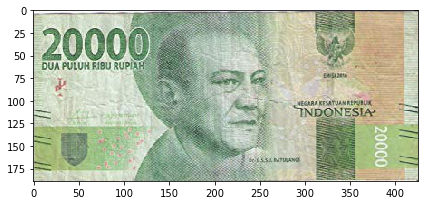

In [93]:
imshow(indonesia_images[1])

In [102]:
for j in range(40):
    g=indo_gray[j]
    indo_gray[j]=resize(g,(600,600))

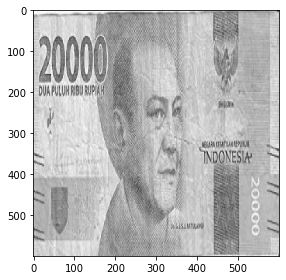

In [103]:
imshow(indo_gray[1])

In [104]:
indo_gray[1].shape

(600, 600)

In [105]:
image_size=(600,600)

In [106]:
flatten_size=image_size[0]*image_size[1]

In [107]:
flatten_size

360000

In [108]:
len_of_indo=len(indo_gray)

In [110]:
len_of_indo

40

In [111]:
for i in range(len_of_indo):
    indo_gray[i]=np.ndarray.flatten(indo_gray[i]).reshape(flatten_size,1)

In [112]:
indo_gray=np.dstack(indo_gray)

In [113]:
indo_gray=np.rollaxis(indo_gray,axis=2,start=0)

In [114]:
indo_gray=indo_gray.reshape(len_of_indo,flatten_size)

In [115]:
indo_gray.shape

(40, 360000)

In [116]:
indo_data=pd.DataFrame(indo_gray)

In [117]:
indo_data

0         1         2         3         4         5         6       \
0   0.078331  0.112800  0.168049  0.182235  0.211741  0.223206  0.165228   
1   0.983884  0.982935  0.982923  0.985499  0.960051  0.965571  0.990765   
2   0.846392  0.835668  0.787577  0.792071  0.778261  0.778932  0.837292   
3   0.952272  0.954165  0.963003  0.971513  0.979885  0.986436  0.990220   
4   0.794800  0.794800  0.796271  0.798722  0.798722  0.798722  0.800193   
5   0.941273  0.848876  0.751855  0.703843  0.716500  0.717664  0.712202   
6   0.921538  0.921538  0.921799  0.925199  0.924894  0.921629  0.922408   
7   0.780696  0.780995  0.782859  0.781395  0.782460  0.793747  0.812336   
8   0.951628  0.947245  0.943249  0.940961  0.943902  0.948478  0.951810   
9   0.967126  0.966975  0.966167  0.977614  0.992498  0.994945  0.996577   
10  0.693208  0.693478  0.694840  0.695766  0.696580  0.697940  0.699672   
11  0.782816  0.777774  0.757666  0.732013  0.708688  0.706793  0.711022   
12  0.879206  0.879206  0.879206  0.877356  0.875284  0.875284  0.875284   
13  0.710648  0.710648  0.687001  0.672713  0.667783  0.673334  0.689366   
14  0.735770  0.737023  0.750177  0.763169  0.776071  0.780345  0.781558   
15  0.996956  0.996800  0.997081  0.997363  0.977087  0.946697  0.920814   
16  0.925475  0.928102  0.929220  0.929796  0.941781  0.954107  0.957214   
17  0.996956  0.996800  0.997081  0.997363  0.977087  0.946697  0.920814   
18  0.925475  0.928102  0.929220  0.929796  0.941781  0.954107  0.957214   
19  0.695323  0.695380  0.695691  0.694095  0.691938  0.689781  0.687772   
20  0.905132  0.905132  0.904932  0.904156  0.902807  0.901502  0.900243   
21  0.695323  0.695380  0.695691  0.694095  0.691938  0.689781  0.687772   
22  0.821545  0.815749  0.791113  0.800067  0.814153  0.821426  0.828424   
23  0.905132  0.905132  0.904932  0.904156  0.902807  0.901502  0.900243   
24  0.970610  0.971032  0.971032  0.971032  0.971032  0.971315  0.971315   
25  0.869366  0.869953  0.872595  0.873875  0.875412  0.877660  0.886751   
26  0.970610  0.971032  0.971032  0.971032  0.971032  0.971315  0.971315   
27  0.869366  0.869953  0.872595  0.873875  0.875412  0.877660  0.886751   
28  0.735270  0.731620  0.728975  0.723895  0.692483  0.734544  0.773169   
29  0.727425  0.727281  0.726682  0.726340  0.725989  0.725195  0.724782   
30  0.064993  0.111352  0.181675  0.184812  0.231003  0.254617  0.167448   
31  0.732679  0.723207  0.672641  0.679092  0.701533  0.707748  0.710989   
32  0.958350  0.958242  0.957568  0.957520  0.957692  0.958357  0.958927   
33  0.046609  0.023981  0.011115  0.011081  0.007213  0.007109  0.013011   
34  0.902531  0.902301  0.900954  0.898168  0.894918  0.891158  0.887299   
35  0.826326  0.779944  0.752511  0.742186  0.747678  0.760723  0.743047   
36  0.952164  0.925629  0.901506  0.893136  0.914041  0.950961  0.948168   
37  0.741016  0.737299  0.731541  0.724230  0.714537  0.708339  0.705222   
38  0.801838  0.850502  0.801333  0.703567  0.678677  0.554860  0.528808   
39  0.978767  0.969821  0.955863  0.953705  0.962874  0.970426  0.961796   

      7         8         9       ...    359990    359991    359992    359993  \
0   0.166774  0.183323  0.185358  ...  0.172062  0.174071  0.168210  0.167108   
1   0.984378  0.988702  0.987822  ...  0.853894  0.856679  0.869409  0.863701   
2   0.844276  0.852210  0.812130  ...  0.922463  0.907782  0.881272  0.893919   
3   0.985699  0.972604  0.949615  ...  0.979871  0.981335  0.983045  0.984968   
4   0.802644  0.802644  0.802644  ...  0.824525  0.826976  0.826976  0.829427   
5   0.720957  0.747957  0.776648  ...  0.698493  0.682997  0.700485  0.707660   
6   0.925348  0.922482  0.923913  ...  0.912155  0.912939  0.913731  0.913931   
7   0.812336  0.812336  0.826602  ...  0.854264  0.831096  0.807081  0.815222   
8   0.942713  0.947288  0.951413  ...  0.896647  0.896647  0.896647  0.896647   
9   0.995999  0.987604  0.964228  ...  0.986056  0.988219  0.991676  0.995807  

In [118]:
indo_data["label"]="indonesia"

In [119]:
indo_data

0         1         2         3         4         5         6  \
0   0.078331  0.112800  0.168049  0.182235  0.211741  0.223206  0.165228   
1   0.983884  0.982935  0.982923  0.985499  0.960051  0.965571  0.990765   
2   0.846392  0.835668  0.787577  0.792071  0.778261  0.778932  0.837292   
3   0.952272  0.954165  0.963003  0.971513  0.979885  0.986436  0.990220   
4   0.794800  0.794800  0.796271  0.798722  0.798722  0.798722  0.800193   
5   0.941273  0.848876  0.751855  0.703843  0.716500  0.717664  0.712202   
6   0.921538  0.921538  0.921799  0.925199  0.924894  0.921629  0.922408   
7   0.780696  0.780995  0.782859  0.781395  0.782460  0.793747  0.812336   
8   0.951628  0.947245  0.943249  0.940961  0.943902  0.948478  0.951810   
9   0.967126  0.966975  0.966167  0.977614  0.992498  0.994945  0.996577   
10  0.693208  0.693478  0.694840  0.695766  0.696580  0.697940  0.699672   
11  0.782816  0.777774  0.757666  0.732013  0.708688  0.706793  0.711022   
12  0.879206  0.879206  0.879206  0.877356  0.875284  0.875284  0.875284   
13  0.710648  0.710648  0.687001  0.672713  0.667783  0.673334  0.689366   
14  0.735770  0.737023  0.750177  0.763169  0.776071  0.780345  0.781558   
15  0.996956  0.996800  0.997081  0.997363  0.977087  0.946697  0.920814   
16  0.925475  0.928102  0.929220  0.929796  0.941781  0.954107  0.957214   
17  0.996956  0.996800  0.997081  0.997363  0.977087  0.946697  0.920814   
18  0.925475  0.928102  0.929220  0.929796  0.941781  0.954107  0.957214   
19  0.695323  0.695380  0.695691  0.694095  0.691938  0.689781  0.687772   
20  0.905132  0.905132  0.904932  0.904156  0.902807  0.901502  0.900243   
21  0.695323  0.695380  0.695691  0.694095  0.691938  0.689781  0.687772   
22  0.821545  0.815749  0.791113  0.800067  0.814153  0.821426  0.828424   
23  0.905132  0.905132  0.904932  0.904156  0.902807  0.901502  0.900243   
24  0.970610  0.971032  0.971032  0.971032  0.971032  0.971315  0.971315   
25  0.869366  0.869953  0.872595  0.873875  0.875412  0.877660  0.886751   
26  0.970610  0.971032  0.971032  0.971032  0.971032  0.971315  0.971315   
27  0.869366  0.869953  0.872595  0.873875  0.875412  0.877660  0.886751   
28  0.735270  0.731620  0.728975  0.723895  0.692483  0.734544  0.773169   
29  0.727425  0.727281  0.726682  0.726340  0.725989  0.725195  0.724782   
30  0.064993  0.111352  0.181675  0.184812  0.231003  0.254617  0.167448   
31  0.732679  0.723207  0.672641  0.679092  0.701533  0.707748  0.710989   
32  0.958350  0.958242  0.957568  0.957520  0.957692  0.958357  0.958927   
33  0.046609  0.023981  0.011115  0.011081  0.007213  0.007109  0.013011   
34  0.902531  0.902301  0.900954  0.898168  0.894918  0.891158  0.887299   
35  0.826326  0.779944  0.752511  0.742186  0.747678  0.760723  0.743047   
36  0.952164  0.925629  0.901506  0.893136  0.914041  0.950961  0.948168   
37  0.741016  0.737299  0.731541  0.724230  0.714537  0.708339  0.705222   
38  0.801838  0.850502  0.801333  0.703567  0.678677  0.554860  0.528808   
39  0.978767  0.969821  0.955863  0.953705  0.962874  0.970426  0.961796   

           7         8         9  ...    359991    359992    359993    359994  \
0   0.166774  0.183323  0.185358  ...  0.174071  0.168210  0.167108  0.188154   
1   0.984378  0.988702  0.987822  ...  0.856679  0.869409  0.863701  0.872534   
2   0.844276  0.852210  0.812130  ...  0.907782  0.881272  0.893919  0.889955   
3   0.985699  0.972604  0.949615  ...  0.981335  0.983045  0.984968  0.987354   
4   0.802644  0.802644  0.802644  ...  0.826976  0.826976  0.829427  0.830898   
5   0.720957  0.747957  0.776648  ...  0.682997  0.700485  0.707660  0.696930   
6   0.925348  0.922482  0.923913  ...  0.912939  0.913731  0.913931  0.913628   
7   0.812336  0.812336  0.826602  ...  0.831096  0.807081  0.815222  0.822579   
8   0.942713  0.947288  0.951413  ...  0.896647  0.896647  0.896647  0.896974   
9   0.995999  0.987604  0.964228  ...  0.988219  0.991676  0.995807  0.992498   
10 

In [120]:
norway=os.listdir("D:/AI Folder/Currency-20220605T061310Z-001/Currency/Norway")

In [121]:
norway

['1.jpeg',
 '10.jpg',
 '11.jpg',
 '12.jpg',
 '13.jpg',
 '14.jpg',
 '15.jpg',
 '16.jpg',
 '17.jpg',
 '18.jpg',
 '19.jpg',
 '2.jpeg',
 '20.jpg',
 '21.jpg',
 '22.jpg',
 '23.jpg',
 '24.jpg',
 '25.jpg',
 '26.jpg',
 '27.jpg',
 '28.jpg',
 '29.jpg',
 '3.jpeg',
 '30.jpg',
 '31.jpg',
 '32.jpg',
 '33.jpg',
 '34.jpg',
 '35.jpg',
 '36.jpg',
 '37.jpg',
 '38.jpg',
 '39.jpg',
 '4.jpg',
 '40.jpg',
 '41.jpg',
 '42.jpg',
 '43.jpg',
 '44.jpg',
 '45.jpg',
 '46.jpg',
 '47.jpg',
 '48.jpg',
 '49.jpg',
 '5.jpg',
 '50.jpg',
 '51.jpg',
 '52.jpg',
 '53.jpg',
 '54.jpg',
 '55.jpg',
 '56.jpg',
 '57.jpg',
 '58.jpg',
 '59.jpg',
 '6.jpg',
 '60.jpg',
 '7.jpg',
 '8.jpg',
 '9.jpg']

In [123]:
limit=60
norway_images=[None]*limit
j=0
for i in norway:
    if(j<limit):
        norway_images[j]=imread("D:/AI Folder/Currency-20220605T061310Z-001/Currency/Norway/"+i)
        j+=1
    else:
        break

In [137]:
limit=60
norw_image=[None]*limit
j=0
for i in norway:
    if(j<limit):
        norw_image[j]=imread("D:/AI Folder/Currency-20220605T061310Z-001/Currency/Norway/"+i)
        print(norw_image[j].shape)
        j+=1
    else:
        break

(158, 318, 3)
(415, 739, 3)
(205, 500, 3)
(382, 736, 3)
(401, 765, 3)
(415, 739, 3)
(418, 733, 3)
(415, 739, 3)
(523, 587, 3)
(522, 587, 3)
(523, 586, 3)
(397, 772, 3)
(299, 500, 3)
(266, 590, 3)
(415, 739, 3)
(95, 200, 3)
(353, 754, 3)
(357, 412, 3)
(419, 731, 3)
(427, 718, 3)
(427, 718, 3)
(421, 729, 3)
(194, 269, 3)
(421, 729, 3)
(427, 719, 3)
(422, 727, 3)
(379, 589, 3)
(378, 586, 3)
(409, 618, 3)
(416, 737, 3)
(411, 738, 3)
(428, 717, 3)
(510, 601, 3)
(345, 772, 3)
(510, 601, 3)
(522, 587, 3)
(523, 587, 3)
(523, 586, 3)
(299, 500, 3)
(292, 600, 3)
(424, 723, 3)
(525, 584, 3)
(425, 722, 3)
(412, 736, 3)
(348, 770, 3)
(421, 729, 3)
(520, 590, 3)
(180, 281, 3)
(191, 294, 3)
(190, 293, 3)
(414, 740, 3)
(430, 463, 3)
(184, 300, 3)
(418, 733, 3)
(415, 738, 3)
(516, 552, 3)
(181, 281, 3)
(366, 687, 3)
(370, 689, 3)
(236, 201, 3)


In [138]:
norw_gray=[None]*limit
j=0
for i in norway:
    if(j<limit):
        norw_gray[j]=rgb2gray(norway_images[j])
        print(norw_gray[j].shape)
        j+=1
    else:
        break

(158, 318)
(415, 739)
(205, 500)
(382, 736)
(401, 765)
(415, 739)
(418, 733)
(415, 739)
(523, 587)
(522, 587)
(523, 586)
(397, 772)
(299, 500)
(266, 590)
(415, 739)
(95, 200)
(353, 754)
(357, 412)
(419, 731)
(427, 718)
(427, 718)
(421, 729)
(194, 269)
(421, 729)
(427, 719)
(422, 727)
(379, 589)
(378, 586)
(409, 618)
(416, 737)
(411, 738)
(428, 717)
(510, 601)
(345, 772)
(510, 601)
(522, 587)
(523, 587)
(523, 586)
(299, 500)
(292, 600)
(424, 723)
(525, 584)
(425, 722)
(412, 736)
(348, 770)
(421, 729)
(520, 590)
(180, 281)
(191, 294)
(190, 293)
(414, 740)
(430, 463)
(184, 300)
(418, 733)
(415, 738)
(516, 552)
(181, 281)
(366, 687)
(370, 689)
(236, 201)


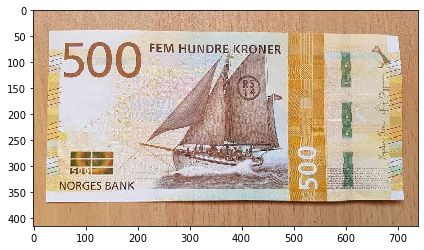

In [139]:
imshow(norway_images[1])

In [140]:
norw_gray[1].shape

(415, 739)

In [141]:
image_size=(600,600)

In [142]:
flatten_size=image_size[0]*image_size[1]

In [143]:
flatten_size

360000

In [144]:
len_of_norw=len(norw_gray)

In [145]:
len_of_norw

60

In [146]:
for i in range(60):
    k=norw_gray[i]
    norw_gray[i]=resize(k,(600,600))

In [147]:
image_size_norway=norw_gray[1].shape

In [148]:
image_size_norway

(600, 600)

In [149]:
for i in range(len_of_norw):
    norw_gray[i]=np.ndarray.flatten(norw_gray[i]).reshape(flatten_size,1)

In [150]:
norw_gray=np.dstack(norw_gray)

In [152]:
norw_gray.shape

(360000, 1, 60)

In [153]:
norw_gray=np.rollaxis(norw_gray,axis=2,start=0)

In [155]:
norw_gray.shape

(60, 360000, 1)

In [156]:
norw_gray=norw_gray.reshape(len_of_norw,flatten_size)

In [157]:
norw_gray.shape

(60, 360000)

In [158]:
norway_data=pd.DataFrame(norw_gray)

In [159]:
norway_data

0         1         2         3         4         5         6       \
0   0.969148  0.969148  0.969148  0.969148  0.969148  0.967521  0.965442   
1   0.693470  0.687278  0.677617  0.677496  0.687695  0.700531  0.713932   
2   0.815750  0.805292  0.802095  0.812934  0.830887  0.841067  0.837758   
3   0.882683  0.888891  0.920117  0.969942  0.998787  0.990211  0.963367   
4   0.919536  0.962477  0.925565  0.921987  0.909242  0.916203  0.914291   
5   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
6   0.932378  0.835291  0.853278  0.853637  0.902311  0.918684  0.838170   
7   0.667350  0.674695  0.686520  0.699360  0.713683  0.723178  0.709207   
8   0.872811  0.767886  0.750163  0.804246  0.844263  0.869192  0.865307   
9   0.884066  0.809034  0.802534  0.831302  0.823063  0.832279  0.860635   
10  0.808356  0.783865  0.762468  0.765724  0.790244  0.809727  0.808852   
11  0.151436  0.151436  0.148626  0.147504  0.144064  0.143593  0.150365   
12  0.989294  0.974264  0.968627  0.979656  0.995341  0.994118  0.974510   
13  0.884852  0.884852  0.884852  0.884852  0.884852  0.884852  0.884852   
14  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
15  0.968696  0.971520  0.968696  0.965871  0.963046  0.961740  0.960434   
16  0.987780  0.944708  0.954767  0.985662  0.993824  0.993824  0.990457   
17  0.888513  0.885010  0.878062  0.870017  0.863818  0.858786  0.855036   
18  0.524268  0.619120  0.747531  0.846028  0.879220  0.864025  0.863648   
19  0.810681  0.818910  0.815338  0.803639  0.807997  0.842334  0.864414   
20  0.923344  0.895741  0.826174  0.826625  0.792229  0.778524  0.796456   
21  0.978424  0.966848  0.920699  0.853683  0.824984  0.853537  0.884722   
22  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
23  0.914464  0.626729  0.576987  0.605582  0.577960  0.606056  0.736776   
24  0.840069  0.830505  0.818858  0.814687  0.820183  0.826224  0.830417   
25  0.867649  0.654849  0.666172  0.745000  0.747854  0.776105  0.808485   
26  0.880153  0.883931  0.894575  0.906767  0.921298  0.931888  0.938648   
27  0.968801  0.884150  0.904310  0.941355  0.939165  0.924410  0.889735   
28  0.946087  0.783085  0.745813  0.770326  0.781807  0.797292  0.815205   
29  0.948658  0.795556  0.770420  0.714376  0.740990  0.799214  0.791890   
30  0.967181  0.946292  0.946167  0.974360  0.992218  0.984583  0.964995   
31  0.763865  0.792755  0.738586  0.754262  0.788197  0.741436  0.725520   
32  0.949904  0.956310  0.934810  0.875106  0.833587  0.808477  0.792397   
33  0.992722  0.992722  0.992722  0.992722  0.992722  0.992722  0.992722   
34  0.887009  0.949466  0.964769  0.905967  0.857677  0.854393  0.857568   
35  0.884066  0.809034  0.802534  0.831302  0.823063  0.832279  0.860635   
36  0.872811  0.767886  0.750163  0.804246  0.844263  0.869192  0.865307   
37  0.808356  0.783865  0.762468  0.765724  0.790244  0.809727  0.808852   
38  0.989294  0.974264  0.968627  0.979656  0.995341  0.994118  0.974510   
39  0.434350  0.502402  0.602284  0.749083  0.742730  0.732450  0.828162   
40  0.931243  0.900316  0.875368  0.879985  0.893631  0.893425  0.894825   
41  0.926267  0.858747  0.815748  0.831001  0.841063  0.823180  0.813750   
42  0.872926  0.872926  0.871224  0.869170  0.869005  0.865083  0.866345   
43  0.907164  0.914336  0.926302  0.943701  0.958623  0.967345  0.979357   
44  0.963314  0.963314  0.963314  0.963314  0.963314  0.963314  0.966615   
45  0.978063  0.889098  0.851377  0.873857  0.894474  0.918884  0.956435   
46  0.934580  0.862839  0.698285  0.614446  0.678016  0.723617  0.706515   
47  0.883559  0.882963  0.887371  0.892161  0.897854  0.903830  0.911269   
48  0.748883  0.747156  0.789458  0.805313  0.787338  0.774669  0.770024   
49  0.749945  0.748056  0.787591  0.814792  0.825532  0.820865  0.791119   
50  0.946673  0.859520  0.825164  0.848491  0.861465  0.869553  0.864769   
51  0.216527  0.216527  0.216527  0.217315  0.220341  

In [160]:
norway_data["label"]="norway"

In [161]:
norway_data

0         1         2         3         4         5         6  \
0   0.969148  0.969148  0.969148  0.969148  0.969148  0.967521  0.965442   
1   0.693470  0.687278  0.677617  0.677496  0.687695  0.700531  0.713932   
2   0.815750  0.805292  0.802095  0.812934  0.830887  0.841067  0.837758   
3   0.882683  0.888891  0.920117  0.969942  0.998787  0.990211  0.963367   
4   0.919536  0.962477  0.925565  0.921987  0.909242  0.916203  0.914291   
5   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
6   0.932378  0.835291  0.853278  0.853637  0.902311  0.918684  0.838170   
7   0.667350  0.674695  0.686520  0.699360  0.713683  0.723178  0.709207   
8   0.872811  0.767886  0.750163  0.804246  0.844263  0.869192  0.865307   
9   0.884066  0.809034  0.802534  0.831302  0.823063  0.832279  0.860635   
10  0.808356  0.783865  0.762468  0.765724  0.790244  0.809727  0.808852   
11  0.151436  0.151436  0.148626  0.147504  0.144064  0.143593  0.150365   
12  0.989294  0.974264  0.968627  0.979656  0.995341  0.994118  0.974510   
13  0.884852  0.884852  0.884852  0.884852  0.884852  0.884852  0.884852   
14  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
15  0.968696  0.971520  0.968696  0.965871  0.963046  0.961740  0.960434   
16  0.987780  0.944708  0.954767  0.985662  0.993824  0.993824  0.990457   
17  0.888513  0.885010  0.878062  0.870017  0.863818  0.858786  0.855036   
18  0.524268  0.619120  0.747531  0.846028  0.879220  0.864025  0.863648   
19  0.810681  0.818910  0.815338  0.803639  0.807997  0.842334  0.864414   
20  0.923344  0.895741  0.826174  0.826625  0.792229  0.778524  0.796456   
21  0.978424  0.966848  0.920699  0.853683  0.824984  0.853537  0.884722   
22  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
23  0.914464  0.626729  0.576987  0.605582  0.577960  0.606056  0.736776   
24  0.840069  0.830505  0.818858  0.814687  0.820183  0.826224  0.830417   
25  0.867649  0.654849  0.666172  0.745000  0.747854  0.776105  0.808485   
26  0.880153  0.883931  0.894575  0.906767  0.921298  0.931888  0.938648   
27  0.968801  0.884150  0.904310  0.941355  0.939165  0.924410  0.889735   
28  0.946087  0.783085  0.745813  0.770326  0.781807  0.797292  0.815205   
29  0.948658  0.795556  0.770420  0.714376  0.740990  0.799214  0.791890   
30  0.967181  0.946292  0.946167  0.974360  0.992218  0.984583  0.964995   
31  0.763865  0.792755  0.738586  0.754262  0.788197  0.741436  0.725520   
32  0.949904  0.956310  0.934810  0.875106  0.833587  0.808477  0.792397   
33  0.992722  0.992722  0.992722  0.992722  0.992722  0.992722  0.992722   
34  0.887009  0.949466  0.964769  0.905967  0.857677  0.854393  0.857568   
35  0.884066  0.809034  0.802534  0.831302  0.823063  0.832279  0.860635   
36  0.872811  0.767886  0.750163  0.804246  0.844263  0.869192  0.865307   
37  0.808356  0.783865  0.762468  0.765724  0.790244  0.809727  0.808852   
38  0.989294  0.974264  0.968627  0.979656  0.995341  0.994118  0.974510   
39  0.434350  0.502402  0.602284  0.749083  0.742730  0.732450  0.828162   
40  0.931243  0.900316  0.875368  0.879985  0.893631  0.893425  0.894825   
41  0.926267  0.858747  0.815748  0.831001  0.841063  0.823180  0.813750   
42  0.872926  0.872926  0.871224  0.869170  0.869005  0.865083  0.866345   
43  0.907164  0.914336  0.926302  0.943701  0.958623  0.967345  0.979357   
44  0.963314  0.963314  0.963314  0.963314  0.963314  0.963314  0.966615   
45  0.978063  0.889098  0.851377  0.873857  0.894474  0.918884  0.956435   
46  0.934580  0.862839  0.698285  0.614446  0.678016  0.723617  0.706515   
47  0.883559  0.882963  0.887371  0.892161  0.897854  0.903830  0.911269   
48  0.748883  0.747156  0.789458  0.805313  0.787338  0.774669  0.770024   
49  0.749945  0.748056  0.787591  0.814792  0.825532  0.820865  0.791119   
50  0.946673  0.859520  0.825164  0.848491  0.861465  0.869553  0.864769   
51  0.216527  0.216527  0.216527  0.217315  0.220341  0.220

In [162]:
currency_1=pd.concat([china_data,indo_data])

In [163]:
currency_1

0         1         2         3         4         5         6  \
0   0.759888  0.757099  0.752973  0.751918  0.750451  0.758815  0.755900   
1   0.003915  0.003935  0.005522  0.005617  0.005853  0.006805  0.005969   
2   0.119745  0.106436  0.086890  0.079384  0.089891  0.099540  0.094060   
3   0.796334  0.821903  0.859986  0.884471  0.881634  0.868992  0.847998   
4   0.605612  0.616519  0.652269  0.757445  0.824805  0.777415  0.784707   
..       ...       ...       ...       ...       ...       ...       ...   
35  0.826326  0.779944  0.752511  0.742186  0.747678  0.760723  0.743047   
36  0.952164  0.925629  0.901506  0.893136  0.914041  0.950961  0.948168   
37  0.741016  0.737299  0.731541  0.724230  0.714537  0.708339  0.705222   
38  0.801838  0.850502  0.801333  0.703567  0.678677  0.554860  0.528808   
39  0.978767  0.969821  0.955863  0.953705  0.962874  0.970426  0.961796   

           7         8         9  ...    359991    359992    359993    359994  \
0   0.754108  0.751805  0.756222  ...  0.719006  0.719515  0.724208  0.728274   
1   0.005482  0.003495  0.000796  ...  0.004330  0.004330  0.004049  0.000721   
2   0.090687  0.080808  0.097371  ...  0.095847  0.095879  0.098759  0.098783   
3   0.837541  0.824373  0.814155  ...  0.805038  0.805596  0.803953  0.807545   
4   0.833622  0.824471  0.808854  ...  0.932827  0.931457  0.920674  0.912516   
..       ...       ...       ...  ...       ...       ...       ...       ...   
35  0.750159  0.753484  0.752376  ...  0.672362  0.664926  0.683035  0.665592   
36  0.902899  0.889932  0.905992  ...  0.380135  0.508690  0.580588  0.347174   
37  0.703716  0.702832  0.701773  ...  0.907584  0.885958  0.876207  0.878582   
38  0.577301  0.632769  0.531490  ...  0.731704  0.712568  0.702785  0.699388   
39  0.939441  0.920550  0.925779  ...  0.986579  0.987772  0.986579  0.981807   

      359995    359996    359997    359998    359999      label  
0   0.726035  0.724807  0.722615  0.726351  0.724124      china  
1   0.001751  0.003859  0.001908  0.001253  0.000576      china  
2   0.102442  0.094067  0.090548  0.098656  0.107341      china  
3   0.807545  0.807545  0.806702  0.800859  0.798675      china  
4   0.907806  0.919718  0.930419  0.779912  0.733995      china  
..       ...       ...       ...       ...       ...        ...  
35  0.669334  0.671540  0.675627  0.694822  0.725117  indonesia  
36  0.324664  0.320632  0.408963  0.595149  0.461355  indonesia  
37  0.869950  0.850649  0.843046  0.848049  0.859043  indonesia  
38  0.692694  0.657054  0.679592  0.709575  0.711945  indonesia  
39  0.978654  0.978000  0.983229  0.988237  0.990704  indonesia  

[100 rows x 360001 columns]

In [164]:
currency_data=pd.concat([currency_1,norway_data])

In [165]:
currency_data

0         1         2         3         4         5         6  \
0   0.759888  0.757099  0.752973  0.751918  0.750451  0.758815  0.755900   
1   0.003915  0.003935  0.005522  0.005617  0.005853  0.006805  0.005969   
2   0.119745  0.106436  0.086890  0.079384  0.089891  0.099540  0.094060   
3   0.796334  0.821903  0.859986  0.884471  0.881634  0.868992  0.847998   
4   0.605612  0.616519  0.652269  0.757445  0.824805  0.777415  0.784707   
..       ...       ...       ...       ...       ...       ...       ...   
55  0.998617  0.998837  0.998869  0.998869  0.998894  0.999203  0.999435   
56  0.845264  0.844842  0.847961  0.848923  0.844783  0.840048  0.832235   
57  0.230077  0.544705  0.716539  0.736446  0.716512  0.729349  0.749171   
58  0.062773  0.054378  0.064785  0.081670  0.089628  0.085790  0.094425   
59  0.262994  0.082611  0.265727  0.448843  0.629703  0.712034  0.794365   

           7         8         9  ...    359991    359992    359993    359994  \
0   0.754108  0.751805  0.756222  ...  0.719006  0.719515  0.724208  0.728274   
1   0.005482  0.003495  0.000796  ...  0.004330  0.004330  0.004049  0.000721   
2   0.090687  0.080808  0.097371  ...  0.095847  0.095879  0.098759  0.098783   
3   0.837541  0.824373  0.814155  ...  0.805038  0.805596  0.803953  0.807545   
4   0.833622  0.824471  0.808854  ...  0.932827  0.931457  0.920674  0.912516   
..       ...       ...       ...  ...       ...       ...       ...       ...   
55  0.999661  0.998745  0.996078  ...  0.992722  0.992722  0.992722  0.992722   
56  0.824635  0.824810  0.824984  ...  0.906791  0.900085  0.890969  0.881786   
57  0.760771  0.758528  0.753227  ...  0.365165  0.318468  0.305480  0.353253   
58  0.082344  0.071445  0.074279  ...  0.292775  0.254235  0.235268  0.200546   
59  0.873707  0.875927  0.878148  ...  0.872206  0.875240  0.882146  0.889203   

      359995    359996    359997    359998    359999   label  
0   0.726035  0.724807  0.722615  0.726351  0.724124   china  
1   0.001751  0.003859  0.001908  0.001253  0.000576   china  
2   0.102442  0.094067  0.090548  0.098656  0.107341   china  
3   0.807545  0.807545  0.806702  0.800859  0.798675   china  
4   0.907806  0.919718  0.930419  0.779912  0.733995   china  
..       ...       ...       ...       ...       ...     ...  
55  0.992722  0.992722  0.992722  0.992722  0.992722  norway  
56  0.891222  0.904256  0.914194  0.922823  0.921656  norway  
57  0.319803  0.274891  0.222145  0.080480  0.076780  norway  
58  0.124732  0.066679  0.060634  0.089338  0.017666  norway  
59  0.896259  0.771675  0.644076  0.516477  0.642172  norway  

[160 rows x 360001 columns]

In [166]:
from sklearn.utils import shuffle

In [167]:
country_currency=shuffle(currency_data).reset_index()

In [168]:
country_currency

index         0         1         2         3         4         5  \
0       48  0.093841  0.088249  0.086773  0.089341  0.090681  0.084745   
1       52  0.013001  0.013001  0.024557  0.029824  0.028803  0.024314   
2       45  0.978063  0.889098  0.851377  0.873857  0.894474  0.918884   
3       56  0.780761  0.807781  0.793696  0.764897  0.773877  0.811020   
4        1  0.693470  0.687278  0.677617  0.677496  0.687695  0.700531   
..     ...       ...       ...       ...       ...       ...       ...   
155     32  0.366166  0.440564  0.444006  0.445343  0.445347  0.445347   
156     24  0.004474  0.003999  0.003702  0.003641  0.003804  0.003921   
157      1  0.003915  0.003935  0.005522  0.005617  0.005853  0.006805   
158     28  0.998496  0.994648  0.992440  0.994186  0.999695  0.999499   
159     25  0.867649  0.654849  0.666172  0.745000  0.747854  0.776105   

            6         7         8  ...    359991        359992    359993  \
0    0.089886  0.086007  0.084728  ...  0.094403  8.994781e-02  0.089934   
1    0.016355  0.017593  0.028026  ...  0.337621  3.330196e-01  0.303359   
2    0.956435  0.982106  0.977377  ...  0.675848  6.680944e-01  0.689498   
3    0.831171  0.823028  0.800928  ...  0.692671  7.064248e-01  0.711681   
4    0.713932  0.708124  0.682630  ...  0.487080  5.382788e-01  0.546241   
..        ...       ...       ...  ...       ...           ...       ...   
155  0.445347  0.445347  0.445347  ...  0.680314  6.803142e-01  0.680314   
156  0.003922  0.003922  0.003922  ...  0.000242  1.390876e-07  0.000198   
157  0.005969  0.005482  0.003495  ...  0.004330  4.329981e-03  0.004049   
158  0.996915  0.993977  0.992815  ...  1.000000  1.000000e+00  1.000000   
159  0.808485  0.832376  0.877373  ...  0.719115  7.297460e-01  0.740699   

       359994    359995    359996    359997    359998    359999   label  
0    0.093813  0.097620  0.084733  0.083401  0.090710  0.090762   china  
1    0.248641  0.178980  0.094379  0.041438  0.020157  0.020157  norway  
2    0.706467  0.698842  0.672067  0.656352  0.661058  0.690358  norway  
3    0.693038  0.672475  0.680194  0.671602  0.653267  0.639757   china  
4    0.527650  0.536103  0.538210  0.527525  0.526624  0.526624  norway  
..        ...       ...       ...       ...       ...       ...     ...  
155  0.680314  0.680314  0.680299  0.679700  0.682710  0.618229   china  
156  0.002785  0.002983  0.003046  0.003859  0.003922  0.003922   china  
157  0.000721  0.001751  0.003859  0.001908  0.001253  0.000576   china  
158  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   china  
159  0.711112  0.704034  0.700702  0.698425  0.693673  0.689442  norway  

[160 rows x 360002 columns]

In [169]:
Final_country_currency=country_currency.drop(['index'],axis=1)

In [170]:
Final_country_currency

0         1         2         3         4         5         6  \
0    0.093841  0.088249  0.086773  0.089341  0.090681  0.084745  0.089886   
1    0.013001  0.013001  0.024557  0.029824  0.028803  0.024314  0.016355   
2    0.978063  0.889098  0.851377  0.873857  0.894474  0.918884  0.956435   
3    0.780761  0.807781  0.793696  0.764897  0.773877  0.811020  0.831171   
4    0.693470  0.687278  0.677617  0.677496  0.687695  0.700531  0.713932   
..        ...       ...       ...       ...       ...       ...       ...   
155  0.366166  0.440564  0.444006  0.445343  0.445347  0.445347  0.445347   
156  0.004474  0.003999  0.003702  0.003641  0.003804  0.003921  0.003922   
157  0.003915  0.003935  0.005522  0.005617  0.005853  0.006805  0.005969   
158  0.998496  0.994648  0.992440  0.994186  0.999695  0.999499  0.996915   
159  0.867649  0.654849  0.666172  0.745000  0.747854  0.776105  0.808485   

            7         8         9  ...    359991        359992    359993  \
0    0.086007  0.084728  0.097981  ...  0.094403  8.994781e-02  0.089934   
1    0.017593  0.028026  0.034176  ...  0.337621  3.330196e-01  0.303359   
2    0.982106  0.977377  0.953015  ...  0.675848  6.680944e-01  0.689498   
3    0.823028  0.800928  0.794037  ...  0.692671  7.064248e-01  0.711681   
4    0.708124  0.682630  0.663750  ...  0.487080  5.382788e-01  0.546241   
..        ...       ...       ...  ...       ...           ...       ...   
155  0.445347  0.445347  0.445347  ...  0.680314  6.803142e-01  0.680314   
156  0.003922  0.003922  0.003922  ...  0.000242  1.390876e-07  0.000198   
157  0.005482  0.003495  0.000796  ...  0.004330  4.329981e-03  0.004049   
158  0.993977  0.992815  0.997964  ...  1.000000  1.000000e+00  1.000000   
159  0.832376  0.877373  0.873132  ...  0.719115  7.297460e-01  0.740699   

       359994    359995    359996    359997    359998    359999   label  
0    0.093813  0.097620  0.084733  0.083401  0.090710  0.090762   china  
1    0.248641  0.178980  0.094379  0.041438  0.020157  0.020157  norway  
2    0.706467  0.698842  0.672067  0.656352  0.661058  0.690358  norway  
3    0.693038  0.672475  0.680194  0.671602  0.653267  0.639757   china  
4    0.527650  0.536103  0.538210  0.527525  0.526624  0.526624  norway  
..        ...       ...       ...       ...       ...       ...     ...  
155  0.680314  0.680314  0.680299  0.679700  0.682710  0.618229   china  
156  0.002785  0.002983  0.003046  0.003859  0.003922  0.003922   china  
157  0.000721  0.001751  0.003859  0.001908  0.001253  0.000576   china  
158  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   china  
159  0.711112  0.704034  0.700702  0.698425  0.693673  0.689442  norway  

[160 rows x 360001 columns]

In [173]:
a=Final_country_currency.values[:,:-1]

In [174]:
b=Final_country_currency.values[:,-1]

In [175]:
a

array([[0.09384135393487816, 0.0882488110306073, 0.08677316145649834,
        ..., 0.08340075502006905, 0.09070959717338385,
        0.09076154470228216],
       [0.013001416993463306, 0.013001416993464625, 0.024556972549020093,
        ..., 0.0414379084967309, 0.020156862745095427,
        0.020156862745105107],
       [0.9780627450980537, 0.8890984382353049, 0.8513770049019607, ...,
        0.6563515277777733, 0.6610584967320234, 0.6903575653594801],
       ...,
       [0.003914994418653795, 0.003935182930298152, 0.005521615265052578,
        ..., 0.001908367114970312, 0.001253388281777906,
        0.0005762744461454582],
       [0.9984962799564276, 0.994648415032679, 0.992440168845316, ...,
        1.0, 1.0, 1.0],
       [0.8676492102396582, 0.6548492810457545, 0.666171791938995, ...,
        0.6984248156863359, 0.6936731816994081, 0.6894416838780583]],
      dtype=object)

In [176]:
from sklearn.model_selection import train_test_split

In [177]:
a_train,a_test,b_train,b_test=train_test_split(a,b,test_size=0.2,random_state=0)

In [178]:
from sklearn import decomposition

In [181]:
pca=decomposition.PCA(n_components=90,whiten=True,random_state=1)

In [184]:
pca.fit(a_train)

PCA(n_components=90, random_state=1, whiten=True)

In [185]:
a_train_pca=pca.transform(a_train)

In [186]:
a_test_pca=pca.transform(a_test)

In [188]:
eigen=(np.reshape(a[100],(600,600)).astype(np.float))

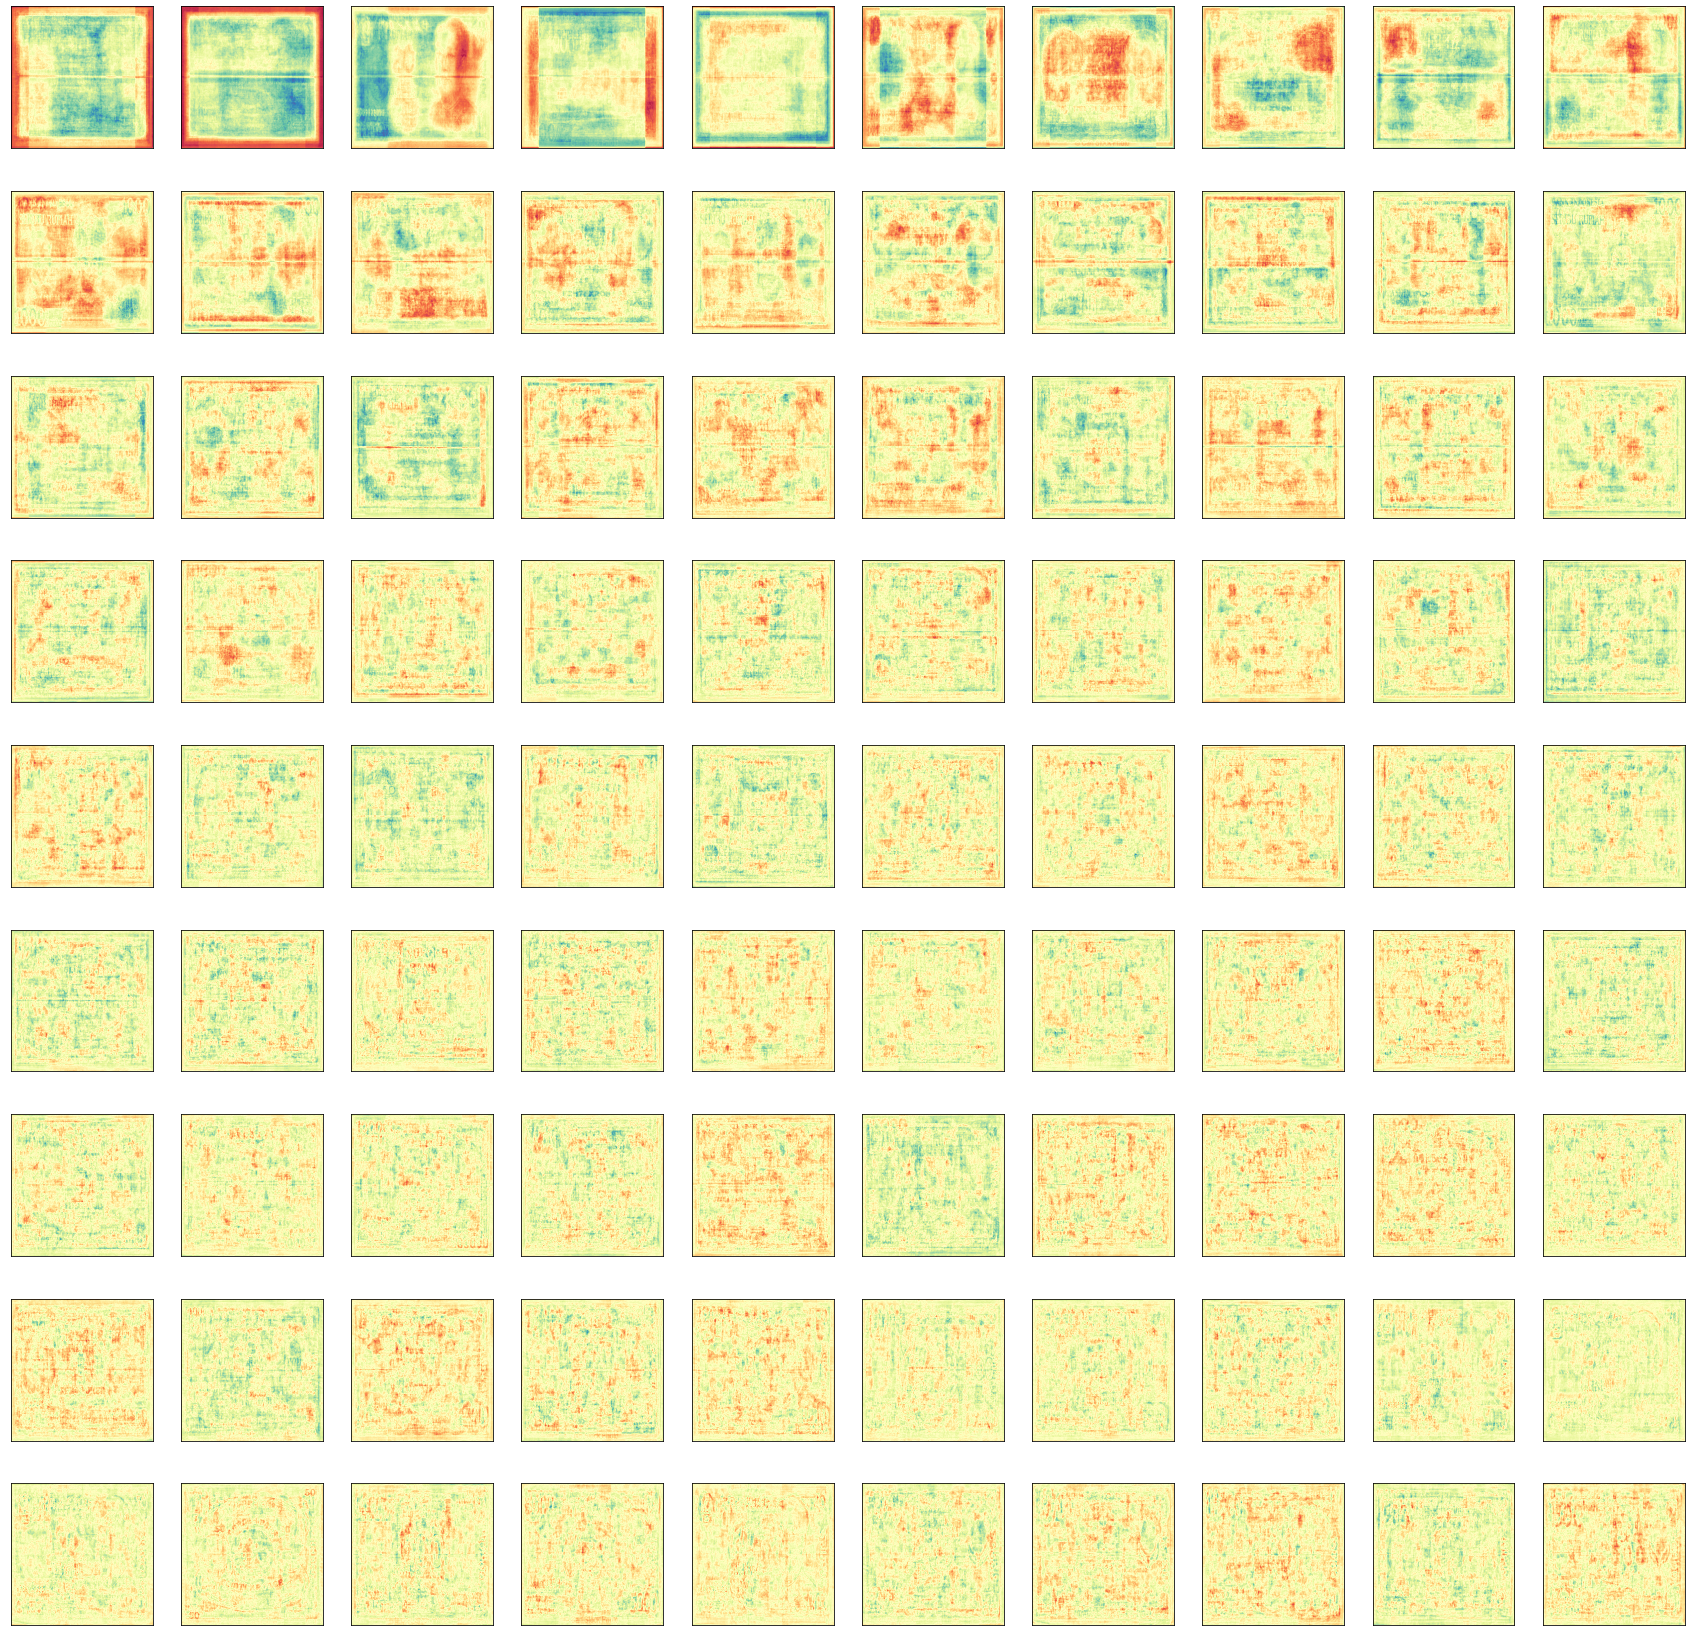

In [190]:
fig=plt.figure(figsize=(30,30))
for i in range(90):
    ax=fig.add_subplot(9,10,i+1,xticks=[],yticks=[])
    ax.imshow(pca.components_[i].reshape(eigen.shape),
             cmap=plt.cm.Spectral)

In [191]:
from sklearn import svm        #svm-support vector machine

In [192]:
img_clf=svm.SVC(C=2.0,gamma=0.006,kernel='rbf',random_state=42)

In [194]:
img_clf.fit(a_train_pca,b_train)

SVC(C=2.0, gamma=0.006, random_state=42)

In [195]:
y_pred=img_clf.predict(a_test_pca)

In [196]:
y_pred

array(['china', 'norway', 'norway', 'norway', 'china', 'indonesia',
       'china', 'norway', 'norway', 'indonesia', 'norway', 'indonesia',
       'indonesia', 'indonesia', 'norway', 'norway', 'norway',
       'indonesia', 'norway', 'norway', 'norway', 'china', 'norway',
       'indonesia', 'norway', 'norway', 'norway', 'norway', 'norway',
       'norway', 'norway', 'indonesia'], dtype=object)

In [197]:
len(y_pred)

32

In [199]:
b_test

array(['china', 'china', 'china', 'norway', 'china', 'china', 'china',
       'china', 'norway', 'china', 'norway', 'indonesia', 'indonesia',
       'china', 'china', 'norway', 'china', 'indonesia', 'norway',
       'china', 'china', 'china', 'norway', 'indonesia', 'norway',
       'china', 'norway', 'norway', 'china', 'norway', 'norway',
       'indonesia'], dtype=object)

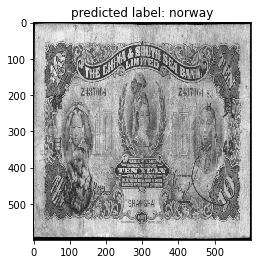

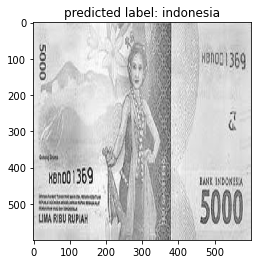

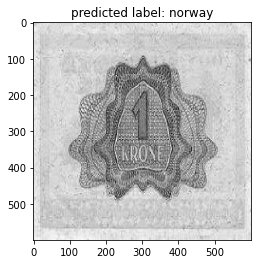

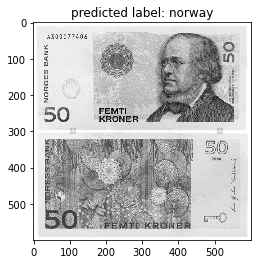

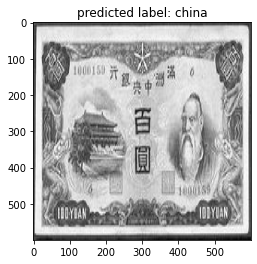

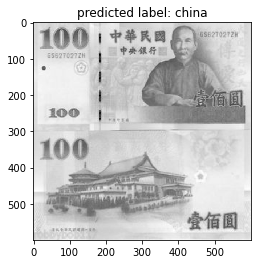

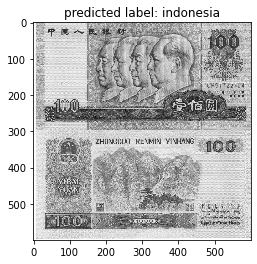

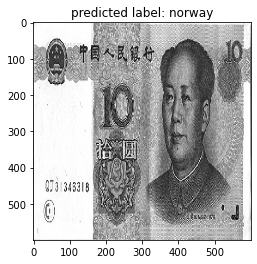

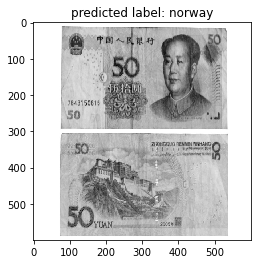

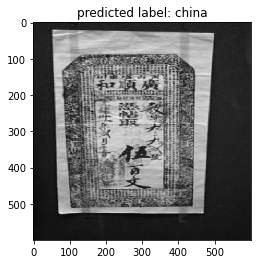

In [200]:
for i in (np.random.randint(0,32,10)):
    predicted_images=(np.reshape(a_test[i],(600,600)).astype(float))
    plt.title('predicted label: {0}'.format(y_pred[i]))
    plt.imshow(predicted_images,interpolation='nearest',cmap='gray')
    plt.show()

In [201]:
a_test.shape

(32, 360000)

In [202]:
from sklearn import metrics

In [203]:
accuracy=metrics.accuracy_score(b_test,y_pred)

In [204]:
accuracy

0.625

In [205]:
from sklearn.metrics import confusion_matrix

In [207]:
confusion_matrix(b_test,y_pred)

array([[ 4,  3,  9],
       [ 0,  5,  0],
       [ 0,  0, 11]], dtype=int64)